EQUACAO DE ADVECCAO-DIFUSAO: CRANK-NICOLSON

JMAX= 11 TMAX= 1.00 T1= 1.00 T2= 0.00
BETA= 0.50000 DELTA= 0.50000
DELTA_T= 0.04000 DELTA_X= 0.40000
S= 0.02500 ALPHA= 0.10000
U= 0.25000 C= 0.02500

t= 0.000 TN = 1.000 1.000 1.000 1.000 0.994 0.512 0.019 0.000 0.000 0.000 0.000 
t= 0.040 TN = 1.000 1.000 1.000 1.000 0.988 0.524 0.037 0.001 0.000 0.000 0.000 
t= 0.080 TN = 1.000 1.000 1.000 1.000 0.983 0.535 0.054 0.003 0.000 0.000 0.000 
t= 0.120 TN = 1.000 1.000 1.000 0.999 0.978 0.545 0.071 0.005 0.000 0.000 0.000 
t= 0.160 TN = 1.000 1.000 1.000 0.999 0.974 0.556 0.088 0.008 0.000 0.000 0.000 
t= 0.200 TN = 1.000 1.000 1.000 0.999 0.970 0.565 0.104 0.011 0.001 0.000 0.000 
t= 0.240 TN = 1.000 1.000 1.000 0.999 0.966 0.574 0.120 0.014 0.001 0.000 0.000 
t= 0.280 TN = 1.000 1.000 1.000 0.998 0.962 0.583 0.136 0.018 0.002 0.000 0.000 
t= 0.320 TN = 1.000 1.000 1.000 0.998 0.959 0.592 0.151 0.023 0.002 0.000 0.000 
t= 0.360 TN = 1.000 1.000 1.000 0.997 0.956 0.600 0.166 0.028 0.003 0.000 0.

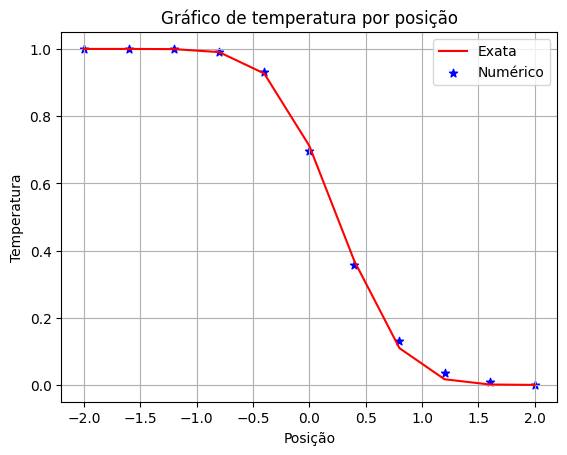

In [2]:
"""
  Trabalho 2 - Métodos Númericos para Equações Diferenciais
  Aluno: Victor Luis Teixeira Reis - 202110049511
"""

import numpy as np
import matplotlib.pyplot as plt

def initial_condition(x):
  """Implementação da condição inicial do problema"""
  if x < 0.0:
    return T_1
  elif x > 0.0:
    return T_2
  else:
    return (T_1 + T_2)/2

def analytic_solution (x, t):
  """Calcula a solução analítica do problema em uma posição x e instante t"""
  serie_length = 10 # Números maiores do que esse tamanho não resultaram em grandes diferenças na aproximação
  partial_sum = 0.0

  for k in range(1, serie_length+1):
    partial_sum += (1/(2*k-1))*np.exp((-alpha*((2*k-1)**2)*(np.pi**2)*t)/(L**2))*np.sin((2*k-1)*((np.pi*(x-u*t))/L))

  return 0.5 - (2/np.pi)*partial_sum

def plot_graph (x_grid, aprox_solution, exact_solution):
  """Plota um gráfico com uma linha representando a solução analítica e pontos representando a solução numérica"""
  plt.plot(x_grid, exact_solution, label="Exata", color="red")
  plt.scatter(x_grid, aprox_solution, label="Numérico", color="blue", marker="*")

  plt.xlabel('Posição')
  plt.ylabel('Temperatura')
  plt.title('Gráfico de temperatura por posição')
  plt.grid(True) 
  plt.legend()
  plt.show()

def print_temperature (time, temperature, solution_type="TN"):
  """Função para printar as temperaturas em cada posição da malha em um instante de tempo"""
  temp_string = ""

  for each_temp in temperature:
    temp_string += f'{each_temp:.3f} '

  print(f't= {time:.3f} {solution_type} = {temp_string}')

def EMQ (aprox_solution, exact_solution, size):
  """Calcula o erro médio quadrado"""
  emq_result = 0.0

  for j in range(size):
    emq_result += (aprox_solution[j] - exact_solution[j])**2

  emq_result = emq_result / size
  emq_result = np.sqrt(emq_result)

  return emq_result


def tdma(a, b, c, temperature, size):
  """Algoritmo de Thomas"""
  d = np.zeros(size)
  new_temperature = np.zeros(size)
  p = np.zeros(size)
  q = np.zeros(size)
  
  d[0] = temperature[0]
  d[size-1] = temperature[size-1]

  for j in range(1, size-1):
    d[j] = (1-beta)*((1-delta)*C+S)*temperature[j-1] + (1-(1-beta)*((1-2*delta)*C+2*S))*temperature[j] + (1-beta)*(-delta*C+S)*temperature[j+1]

  # Condições de contorno
  p[0] = 0.0
  q[0] = T_1
  p[size-1] = 0.0
  q[size-1] = T_2

  for j in range(1, size-1):
    p[j] = b[j] / (a[j] - c[j]*p[j-1])
    q[j] = (d[j] + c[j]*q[j-1]) / (a[j] - c[j]*p[j-1])

  new_temperature[size-1] = q[size-1]

  for j in range(size-2, -1, -1):
    new_temperature[j] = p[j]*new_temperature[j+1] + q[j]

  return new_temperature
    
def solve_partial_equation(temperature, final_t, size):
  """Função principal para a resolução do problema"""
  # Expressões que calculam os elementos aj, bj, cj,
  a_j = 1 + beta*((1-2*delta)*C + 2*S)
  b_j = beta*(-delta*C + S)
  c_j = beta*((1-delta)*C + S)

  a = np.array([a_j for _ in range(size)])
  b = np.array([b_j for _ in range(size)])
  c = np.array([c_j for _ in range(size)])

  for j in np.arange(0.0, final_t+delta_t, delta_t):
    temperature = tdma(a, b, c, temperature, size)
    
    print_temperature(j, temperature)

  return temperature
  
#####################################################################
#  Variáveis Gerais
#####################################################################

u = 0.25 # Velocidade de advecção
alpha = 0.1 # Difusividade térmica
delta_x, delta_t = 0.4, 0.04

C = (u*delta_t)/delta_x
S = (alpha*delta_t)/(delta_x**2)

# 0.0, 0.5, 0.5*(1-C)
beta, delta = 0.5, 0.5

T_1 = 1.0
T_2 = 0.0

X_1 = -2.0
X_2 = 2.0

L = X_2 - X_1

final_t = 1.0

size = int((L/delta_x) + 1)
x_grid = np.linspace(X_1, X_2, size)

initial_temperature = np.array([initial_condition(x) for x in x_grid])

#####################################################################
#  Resolução
#####################################################################
run_method = True

if beta == 0.5:
  print(f'EQUACAO DE ADVECCAO-DIFUSAO: CRANK-NICOLSON\n')
elif beta == 1.0:
  print(f'EQUACAO DE ADVECCAO-DIFUSAO: TOTALMENTE IMPLÍCITO\n')
elif beta == 0 and delta == 0.5:
  print(f'EQUACAO DE ADVECCAO-DIFUSAO: FTCS (EXPLÍCITO)\n')
  
  if 0 > C**2 or C**2 > 2*S or 2*S > 1:
    print("Condição de estabilidade não satisfeita (0 <= C² <= 2s <= 1)!")
    run_method = False

elif beta == 0 and delta == 0:
  print(f'EQUACAO DE ADVECCAO-DIFUSAO: UPWIND (EXPLÍCITO)\n')

  if C + 2*S > 1:
    print("Condição de estabilidade não satisfeita (C + 2s <= 1)!")
    run_method = False
  
elif beta == 0 and delta == 0.5*(1-C):
  print(f'EQUACAO DE ADVECCAO-DIFUSAO: LAX-WENDROF (EXPLÍCITO)\n')

  if (C**2)+ 2*S > 1:
    print("Condição de estabilidade não satisfeita (C² + 2s <= 1)!")
    run_method = False

if run_method:
  print(f'JMAX= {size:.0f} TMAX= {T_1:.2f} T1= {T_1:.2f} T2= {T_2:.2f}')
  print(f'BETA= {beta:.5f} DELTA= {delta:.5f}')
  print(f'DELTA_T= {delta_t:.5f} DELTA_X= {delta_x:.5f}')
  print(f'S= {S:.5f} ALPHA= {alpha:.5f}')
  print(f'U= {u:.5f} C= {C:.5f}\n')

  aprox_final_temperature = solve_partial_equation(initial_temperature, final_t, size)
  exact_final_temperature = np.array([analytic_solution(x, final_t) for x in x_grid])

  print() # Só para dar um pulo de linha no console

  print_temperature(final_t, exact_final_temperature, solution_type="TE")

  quadratic_error = EMQ(aprox_final_temperature, exact_final_temperature, size)

  print(f'\nEMQ= {quadratic_error:.4f}')

  plot_graph(x_grid, aprox_final_temperature, exact_final_temperature)

